In [1]:
import math
import random

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.ticker import MultipleLocator

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tabulate import tabulate

2025-02-19 16:33:05.612938: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-19 16:33:06.289231: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def plot_matriz_confusion(axes,TP=0,TN=0,FP=0,FN=0,fontsize=15,titulo=None,vpp=None,vpn=None,sensibilidad=None,especificidad=None,f1_score=None,mcc=None,auc=None,prevalencia=None):
    success_color=matplotlib.colors.to_rgb('#9EE548')
    failure_color=matplotlib.colors.to_rgb("#C32240")
    blanco_color=matplotlib.colors.to_rgb("#FFFFFF")


    if ((vpp is not None) | 
        (vpn is not None) | 
        (sensibilidad is not None) |
        (especificidad is not None) | 
        (prevalencia is not None) |
        (f1_score is not None) | 
        (mcc is not None) |
        (auc is not None) ):
        show_metrics=True
    else:
        show_metrics=False


    if show_metrics==False:
        axes.imshow([[success_color,failure_color],[failure_color,success_color]])
    else:
        axes.imshow([[success_color,failure_color,blanco_color],[failure_color,success_color,blanco_color],[blanco_color,blanco_color,blanco_color]])


    if titulo==None:
        titulo="Predicción"
    else:
        titulo=titulo+"\nPredicción"

    labels = ['Positivo','Negativo']
    xaxis = np.arange(len(labels))
    axes.set_xticks(xaxis)
    axes.set_yticks(xaxis)
    axes.set_xticklabels(labels, fontsize=13, color="#003B80")
    axes.set_yticklabels(labels, fontsize=13, color="#003B80")
    axes.text(0, 0, str(TP)+" TP",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.text(0, 1, str(FP)+" FP",ha="center", va="center", color="#FAEAEA",fontsize=fontsize) 
    axes.text(1, 0, str(FN)+" FN",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 1, str(TN)+" TN",ha="center", va="center", color="#0A2102",fontsize=fontsize)         
    axes.xaxis.tick_top()
    axes.set_xlabel(titulo, fontsize=fontsize, color="#003B80") 
    axes.xaxis.set_label_position('top') 
    axes.set_ylabel('Realidad', fontsize=fontsize, color="#003B80") 


    if show_metrics==True:


        if (vpp is not None):
            axes.text(0, 2, f"Precision\n{vpp:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (vpn is not None):
            axes.text(1, 2, f"VPN\n{vpn:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4)
        if (sensibilidad is not None):
            axes.text(2, 0, f"Sensibilidad\n{sensibilidad:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4) 
        if (especificidad is not None):
            axes.text(2, 1, f"Especificidad\n{especificidad:.2f}",ha="center", va="center", color="#0A2102",fontsize=fontsize-4) 

        metricas_generales=""
        if (prevalencia is not None):
            metricas_generales=metricas_generales+f"Prevalencia\n{prevalencia:.2f}\n"        
        if (f1_score is not None):
            metricas_generales=metricas_generales+f"F1-score\n{f1_score:.2f}\n"   
        if (mcc is not None):
            metricas_generales=metricas_generales+f"MCC\n{mcc:.2f}\n"  
        if (auc is not None):
            metricas_generales=metricas_generales+f"AUC\n{auc:.2f}"             

        axes.text(2, 2, metricas_generales,ha="center", va="center", color="#0A2102",fontsize=fontsize-4)          

def axes_configure_labels(axes,title,xlabel,ylabel):
    color="#003B80"
    facecolor="#FAFCFF"
    gridcolor="#BAD4F2"
    tickcolor="#011E32"
    fontsize_label=13
 
    axes.set_xlabel(xlabel, fontsize=fontsize_label,color=color)
    axes.set_ylabel(ylabel, fontsize=fontsize_label,color=color)
    axes.set_title(title,color=color)
 
    axes.set_facecolor(facecolor)
    axes.spines['bottom'].set_color(tickcolor)
    axes.spines['top'].set_color(tickcolor)
    axes.spines['right'].set_color(tickcolor)
    axes.spines['left'].set_color(tickcolor)
    axes.tick_params(axis='both', colors=tickcolor)
 
    axes.grid(visible=True, which='major', axis='both',color=gridcolor,linewidth=1,zorder=-10)
    axes.set_axisbelow(True)
 
    handles, labels = axes.get_legend_handles_labels()
    if labels:
        axes.legend(fontsize=fontsize_label-2,labelcolor=color)


def axes_configure_axis_for_metrics(axes):
    axes.set_xlim(xmin=0,xmax=1)
    axes.set_ylim(ymin=0,ymax=1.1)
 
    axes.xaxis.set_major_locator(MultipleLocator(0.1))
    axes.yaxis.set_major_locator(MultipleLocator(0.1))

Verdaderos Positivos= 8
Verdaderos Negativos= 4
Falsos Positivos= 3
Falsos Negativos= 5


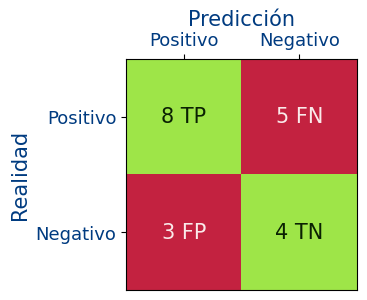

In [3]:
#Ejercicio 1
print("Verdaderos Positivos=",8)
print("Verdaderos Negativos=",4)
print("Falsos Positivos=",3)
print("Falsos Negativos=",5)


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=8,TN=4,FP=3,FN=5)




In [4]:
#Ejercicio 2.A
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5

print(y_pred)

[False False  True  True False False False False  True  True  True False
 False]


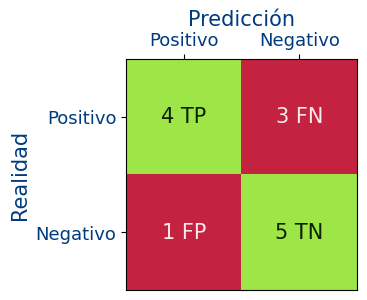

In [5]:
#Ejercicio 2.B
y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5


TP = sum((y_true==1) & (y_pred==1))
TN = sum((y_true==0) & (y_pred==0))
FN = sum((y_true==1) & (y_pred==0))
FP = sum((y_true==0) & (y_pred==1))

figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN)


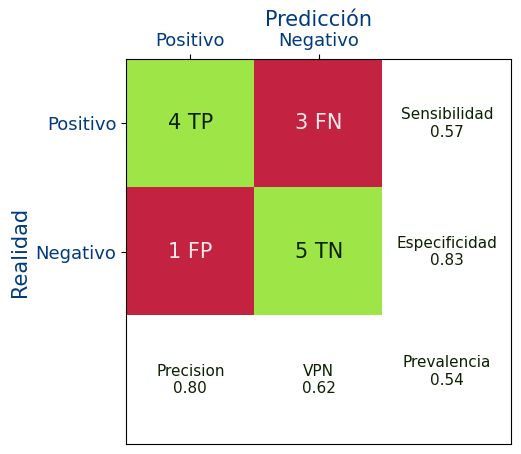

In [6]:
#Ejercicio 2.C


y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])
y_pred=y_score>0.5

TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))

sensibilidad=TP/(TP+FN)
especificidad=TN/(TN+FP)
prevalencia=(TP+FN)/(TP+FN+FP+TN)
vpp=TP/(TP+FP)
vpn=TN/(FN+TN)

figure=plt.figure(figsize=(5, 5)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN,
        sensibilidad=sensibilidad,
        especificidad=especificidad,
        prevalencia=prevalencia,vpn=vpn,vpp=vpp)

In [7]:
# Ejercicio 2.D
vpp_bayes=(sensibilidad*prevalencia)/(sensibilidad*prevalencia+(1-especificidad)*(1-prevalencia))
vpn_bayes=(especificidad*(1-prevalencia))/(especificidad*(1-prevalencia)+(1-sensibilidad)*prevalencia)

print(f"VPP Bayes={vpp_bayes:.2f}")
print(f"VPN Bayes={vpn_bayes:.2f}")

VPP Bayes=0.80
VPN Bayes=0.62


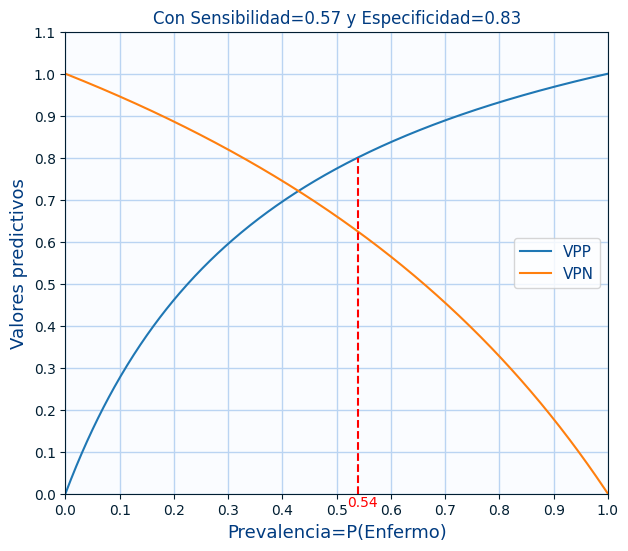

In [8]:
# Ejercicio 2.E


rango_prevalencia=np.linspace(0,1,500)

rango_vpp=(sensibilidad*rango_prevalencia)/(sensibilidad*rango_prevalencia+(1-especificidad)*(1-rango_prevalencia))
rango_vpn=(especificidad*(1-rango_prevalencia))/(especificidad*(1-rango_prevalencia)+(1-sensibilidad)*rango_prevalencia)



figure=plt.figure(figsize=(7, 6)) 
axes=figure.add_subplot(1,1,1)
 
axes.plot(rango_prevalencia,rango_vpp,linestyle="solid",label="VPP")
axes.plot(rango_prevalencia,rango_vpn,linestyle="solid",label="VPN")

#La prevalencia original
axes.vlines(x = prevalencia, ymin = 0, ymax = max(vpp,vpn),colors = '#ff0000',linestyle="dashed")
axes.text(prevalencia-0.02,-0.03,f'{prevalencia:0.2f}',c="#ff0000")

axes_configure_labels(axes,f"Con Sensibilidad={sensibilidad:.2f} y Especificidad={especificidad:.2f}","Prevalencia=P(Enfermo)","Valores predictivos")
axes_configure_axis_for_metrics(axes)

figure.savefig("prevalencia-sensibilidad-especificidad.png",facecolor="#FFFFFF",bbox_inches='tight')


/home/logongas/Documentos/desarrollo/python_default_env/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


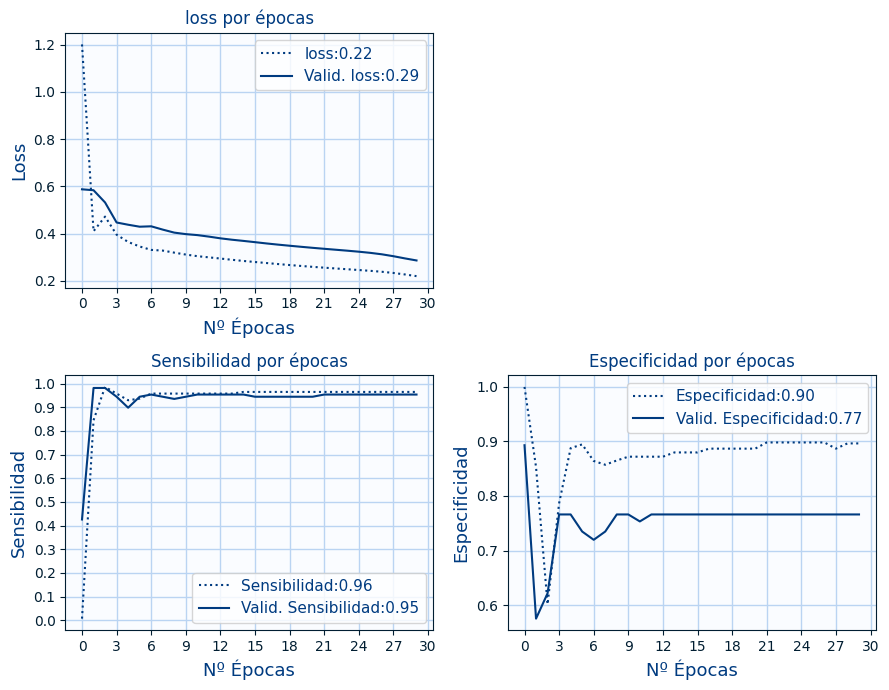

In [18]:
#Ejercicio 3.A
def compile_fit(capas,activation,last_activation,loss,optimizer,epochs,x_train, x_test, y_train, y_test,metrics=[]):

    input_dim=x_train.shape[1]

    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)
   
    model=Sequential()
    for index,neuronas_capa in enumerate(capas):
        if (index==0):
            model.add(Dense(neuronas_capa, activation=activation,input_dim=input_dim))
        elif (index==len(capas)-1):
            model.add(Dense(neuronas_capa, activation=last_activation))          
        else:
            model.add(Dense(neuronas_capa, activation=activation))

    model.compile(loss=loss,optimizer=optimizer,metrics=metrics)
   
    history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,verbose=False)

    return history,model


def get_datos(seed=42):
    datos=load_breast_cancer()
    x=datos.data
    y=datos.target

    x_train, x_test_validacion, y_train, y_test_validacion = train_test_split(x, y, test_size=0.6, random_state=seed,stratify=y)

    x_validacion, x_test, y_validacion, y_test =train_test_split(x_test_validacion, y_test_validacion, test_size=0.5, random_state=seed,stratify=y_test_validacion)

    return x_train, x_validacion, x_test,y_train, y_validacion, y_test




def specificity(y_true, y_score,threshold = 0.5):
    
    y_true = K.cast(y_true, dtype='float32')
    y_pred = K.cast(y_score > threshold, dtype='float32')



    y_true = tf.reshape(y_true, (-1, 1))
    y_pred = tf.reshape(y_pred, (-1, 1))


    TN = K.sum((1 - y_true) * (1 - y_pred))  
    FP = K.sum((1 - y_true) * y_pred)        

    specificity = TN / (TN + FP + K.epsilon())  

    return specificity

def plot_history_metric(axes,history,metric_name,label=None,color="#003B80",decimales=2):

    if (label==None):
        label=metric_name

    axes.plot(history[metric_name],linestyle="dotted",c=color,label=f"{label}:{history[metric_name][-1]:.{decimales}f}")  
    axes.plot(history['val_'+metric_name],linestyle="solid",c=color,label=f"Valid. {label}:{history['val_'+metric_name][-1]:.{decimales}f}")  



x_train, x_validacion, x_test,y_train, y_validacion, y_test=get_datos()

capas=[30,60,120,200,120,60,30,15,1]
activation="swish"
epochs=30
optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)
metrics=["Recall",specificity]

history,model=compile_fit(capas,activation,"sigmoid","binary_crossentropy",optimizer,epochs,x_train, x_validacion, y_train, y_validacion,metrics)


figure=plt.figure(figsize=(9, 7))


axes=figure.add_subplot(2,2,1)
plot_history_metric(axes,history.history,"loss")
axes_configure_labels(axes,"loss por épocas","Nº Épocas","Loss")
axes.xaxis.set_major_locator(MultipleLocator(math.floor(epochs/10)))
axes.yaxis.set_major_locator(MultipleLocator(0.2))

axes=figure.add_subplot(2,2,3)
plot_history_metric(axes,history.history,"Recall","Sensibilidad")
axes_configure_labels(axes,"Sensibilidad por épocas","Nº Épocas","Sensibilidad")
axes.xaxis.set_major_locator(MultipleLocator(math.floor(epochs/10)))
axes.yaxis.set_major_locator(MultipleLocator(0.1))

axes=figure.add_subplot(2,2,4)
plot_history_metric(axes,history.history,"specificity","Especificidad")
axes_configure_labels(axes,"Especificidad por épocas","Nº Épocas","Especificidad")
axes.xaxis.set_major_locator(MultipleLocator(math.floor(epochs/10)))
axes.yaxis.set_major_locator(MultipleLocator(0.1))

figure.tight_layout()


figure.savefig("metricas-epocas.png",facecolor="#FFFFFF",bbox_inches='tight')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


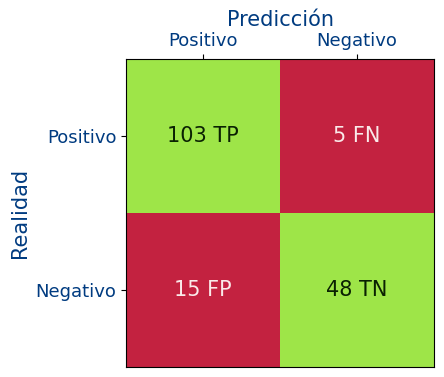

In [10]:
#Ejercicio 3.B

def get_y_pred(y_score,threshold):
    return y_score>threshold

def get_matriz_confusion(y_true,y_score,threshold):

    y_pred=get_y_pred(y_score,threshold)

    TP=sum((y_true==1) & (y_pred==1))
    TN=sum((y_true==0) & (y_pred==0))
    FP=sum((y_true==0) & (y_pred==1))
    FN=sum((y_true==1) & (y_pred==0))


    return TP,TN,FP,FN

y_score=model.predict(x_validacion).reshape(-1)
y_true=y_validacion
TP,TN,FP,FN=get_matriz_confusion(y_true,y_score,threshold=0.5)

figure=plt.figure(figsize=(4,4)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN)


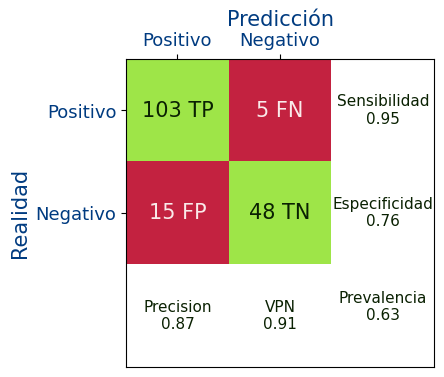

In [11]:
#Ejercicio 3.C

def div_not_nan(a,b):
    if (b==0):
        return 0
    else:
        return a/b
    

def get_metrics(TP,TN,FP,FN,prevalencia=None):
    sensibilidad=div_not_nan(TP,TP+FN)
    especificidad=div_not_nan(TN,TN+FP)
    
    if (prevalencia==None):
        vpp=div_not_nan(TP,TP+FP)
        vpn=div_not_nan(TN,TN+FN)
        prevalencia=(TP+FN)/(TP+FP+TN+FN)
    else:
        vpp=div_not_nan(sensibilidad*prevalencia,sensibilidad*prevalencia+(1-especificidad)*(1-prevalencia))
        vpn=div_not_nan(especificidad*(1-prevalencia),especificidad*(1-prevalencia)+(1-sensibilidad)*prevalencia)




    return sensibilidad,especificidad,vpp,vpn,prevalencia


sensibilidad,especificidad,vpp,vpn,prevalencia=get_metrics(TP,TN,FP,FN)


figure=plt.figure(figsize=(4,4)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN,sensibilidad=sensibilidad,especificidad=especificidad,vpp=vpp,vpn=vpn,prevalencia=prevalencia)


In [12]:
#Ejercicio 3.D
model.save('mymodel.keras') 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


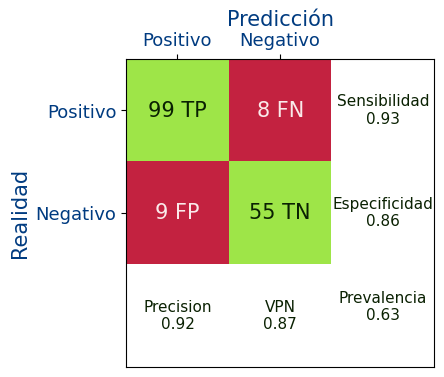

In [13]:
#Ejercicio 4
new_model=tf.keras.models.load_model('mymodel.keras',custom_objects={"specificity": specificity})

x_train, x_validacion, x_test,y_train, y_validacion, y_test=get_datos()
y_score=new_model.predict(x_test).reshape(-1)
y_true=y_test

TP,TN,FP,FN=get_matriz_confusion(y_true,y_score,threshold=0.5)
sensibilidad,especificidad,vpp,vpn,prevalencia=get_metrics(TP,TN,FP,FN)
figure=plt.figure(figsize=(4,4)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,TN=TN,FP=FP,FN=FN,sensibilidad=sensibilidad,especificidad=especificidad,vpp=vpp,vpn=vpn,prevalencia=prevalencia)




6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


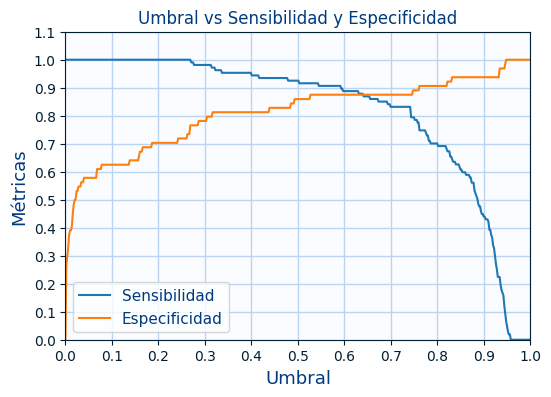

In [14]:
# Ejercicio 5.A

x_train, x_validacion, x_test,y_train, y_validacion, y_test=get_datos()
y_score=new_model.predict(x_test).reshape(-1)
y_true=y_test


def get_threshold_sensibilidad_especificidad(y_true,y_score):
    rango_threshold=np.linspace(0,1,500)
    rango_sensibilidad=[]
    rango_especificidad=[]
    for threshold in rango_threshold:
        TP,TN,FP,FN=get_matriz_confusion(y_true,y_score,threshold=threshold)
        sensibilidad,especificidad,_,_,_=get_metrics(TP,TN,FP,FN)
        rango_sensibilidad.append(sensibilidad)
        rango_especificidad.append(especificidad)
    
    return rango_threshold,rango_sensibilidad,rango_especificidad


rango_threshold,rango_sensibilidad,rango_especificidad=get_threshold_sensibilidad_especificidad(y_true,y_score)

figure=plt.figure(figsize=(6, 4)) 
axes=figure.add_subplot(1,1,1)
axes.plot(rango_threshold,rango_sensibilidad,linestyle="solid",label="Sensibilidad")
axes.plot(rango_threshold,rango_especificidad,linestyle="solid",label="Especificidad")
axes_configure_labels(axes,"Umbral vs Sensibilidad y Especificidad","Umbral","Métricas")
axes_configure_axis_for_metrics(axes)


figure.savefig("threshold-metricas.png",facecolor="#FFFFFF",bbox_inches='tight')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Mejor un alto VPN ya que así nadie enfermo se queda sin diagnosticar
Mejor Umbral= 0.3


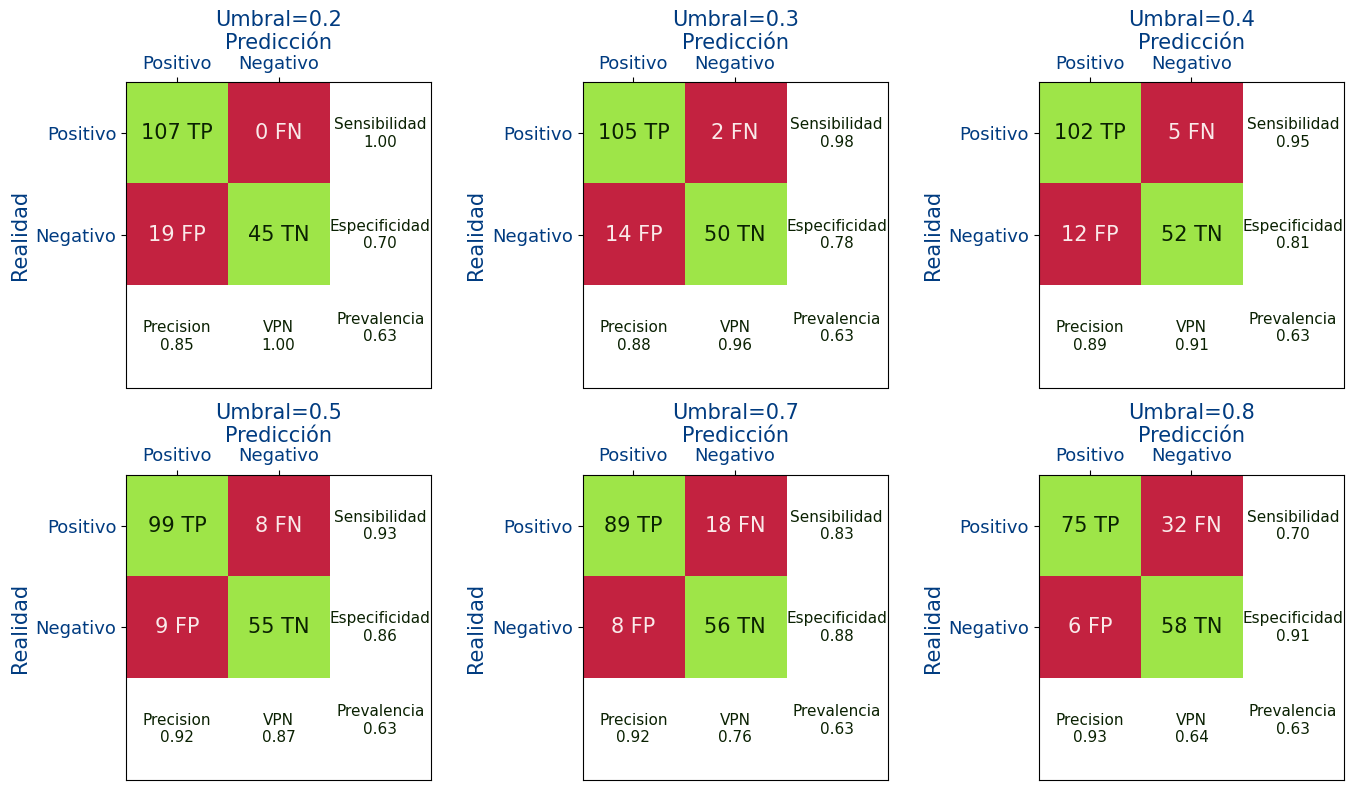

In [15]:
#Ejercicio 5.B
new_model=tf.keras.models.load_model('mymodel.keras',custom_objects={"specificity": specificity})

x_train, x_validacion, x_test,y_train, y_validacion, y_test=get_datos()
y_score=new_model.predict(x_test).reshape(-1)
y_true=y_test




figure=plt.figure(figsize=(14,8)) 

thresholds=[
    0.2,0.3,0.4,
    0.5,0.7,0.8
]
for index,threshold in enumerate(thresholds):
    axes=figure.add_subplot(2,3,index+1)
    TP,TN,FP,FN=get_matriz_confusion(y_true,y_score,threshold=threshold)
    sensibilidad,especificidad,vpp,vpn,prevalencia=get_metrics(TP,TN,FP,FN)
    plot_matriz_confusion(axes,titulo=f"Umbral={threshold}",TP=TP,TN=TN,FP=FP,FN=FN,sensibilidad=sensibilidad,especificidad=especificidad,vpp=vpp,vpn=vpn,prevalencia=prevalencia)


figure.tight_layout()

print("Mejor un alto VPN ya que así nadie enfermo se queda sin diagnosticar")
best_threshold=0.3
print("Mejor Umbral=",best_threshold)


figure.savefig("matriz-confusion-varios-umbrales.png",facecolor="#FFFFFF",bbox_inches='tight')


In [16]:
#Ejercicio 5.C 

def get_paciente_a_probar(indices,y_pred,order):
    y_pred_values = y_pred[indices]
    sorted_indices = indices[0][np.argsort(order*y_pred_values)]

    return sorted_indices[0]

def get_pacientes_a_probar():
    breast_cancer=load_breast_cancer()
    tolerancia=0.07
    desc=-1
    asc=1
    numeros_pacientes=[]

    y_pred=new_model.predict(breast_cancer.data,verbose=False).reshape(-1)

    #TP Malo:
    numeros_pacientes.append(get_paciente_a_probar(np.where((breast_cancer.target==1) & (y_pred>best_threshold) & (y_pred<best_threshold+tolerancia)),y_pred,asc))
    #TP Bueno
    numeros_pacientes.append(get_paciente_a_probar(np.where((breast_cancer.target==1) & (y_pred>1-tolerancia) & (y_pred<1)),y_pred,desc))

    #FP Malo
    numeros_pacientes.append(get_paciente_a_probar(np.where((breast_cancer.target==0) & (y_pred>1-tolerancia) & (y_pred<1)),y_pred,desc))
    #FP Casi bueno
    numeros_pacientes.append(get_paciente_a_probar(np.where((breast_cancer.target==0) & (y_pred>best_threshold) & (y_pred<best_threshold+tolerancia)),y_pred,asc))

    #TN Malo
    numeros_pacientes.append(get_paciente_a_probar(np.where((breast_cancer.target==0) & (y_pred>best_threshold-tolerancia) & (y_pred<best_threshold)),y_pred,desc))
    #TN Bueno
    numeros_pacientes.append(get_paciente_a_probar(np.where((breast_cancer.target==0) & (y_pred>0.0) & (y_pred<tolerancia)),y_pred,asc))

    #FN Malo
    numeros_pacientes.append(get_paciente_a_probar(np.where((breast_cancer.target==1) & (y_pred>0.0) & (y_pred<=tolerancia)),y_pred,desc))
    #FN Casi bueno
    numeros_pacientes.append(get_paciente_a_probar(np.where((breast_cancer.target==1) & (y_pred>best_threshold-tolerancia) & (y_pred<best_threshold)),y_pred,asc))

    return numeros_pacientes


new_model=tf.keras.models.load_model('mymodel.keras',custom_objects={"specificity": specificity})

x_train, x_validacion, x_test,y_train, y_validacion, y_test=get_datos()
y_score=new_model.predict(x_test,verbose=False).reshape(-1)
y_true=y_test

best_threshold=0.3
TP,TN,FP,FN=get_matriz_confusion(y_true,y_score,threshold=best_threshold)
sensibilidad,especificidad,vpp,vpn,prevalencia=get_metrics(TP,TN,FP,FN)

breast_cancer=load_breast_cancer()
numeros_pacientes=get_pacientes_a_probar()

resultados=[]

for numero_paciente in numeros_pacientes:
    x_paciente=breast_cancer.data[numero_paciente,:]
    y_score_pred=new_model.predict(x_paciente.reshape(1,-1),verbose=False)[0,0]

    if (breast_cancer.target[numero_paciente]==1):
        realidad="Enfermo"
    else:
        realidad="Sano"

    if (y_score_pred>best_threshold):
        prediccion="Positivo"
        metrica=f"{vpp*100:.0f}% VPP"
    else:
        prediccion="Negativo"
        metrica=f"{vpn*100:.0f}% VPN"

    resultado_y_score=f"{y_score_pred:.7f}"

    resultados.append(["Nº " + str(numero_paciente),resultado_y_score,best_threshold,prediccion,metrica,realidad])


print(tabulate(resultados, headers=["Paciente", "y_score","Umbral" ,"Resultado\nTest","Prob.\nAcierto","Realidad"]))


Paciente      y_score    Umbral  Resultado    Prob.      Realidad
                                 Test         Acierto
----------  ---------  --------  -----------  ---------  ----------
Nº 532       0.313794       0.3  Positivo     88% VPP    Enfermo
Nº 270       0.95804        0.3  Positivo     88% VPP    Enfermo
Nº 213       0.958994       0.3  Positivo     88% VPP    Sano
Nº 533       0.303578       0.3  Positivo     88% VPP    Sano
Nº 214       0.286227       0.3  Negativo     96% VPN    Sano
Nº 265       0              0.3  Negativo     96% VPN    Sano
Nº 92        0.0624         0.3  Negativo     96% VPN    Enfermo
Nº 465       0.251202       0.3  Negativo     96% VPN    Enfermo


In [17]:
# Ejercicio 7

print("Una IA que detecta si hay petroleo en el subsuelo", "==>","Alto VPP")
print("Una IA que predice si un usuario en Amazon está cometiendo fraude", "==>","Alto VPN")
print("Una IA que decide si te concede un préstamo", "==>","Alto VPP")
print("Una IA que decide una persona en un juicio es inocente", "==>","Altísimo VPP")
print("Una IA que corrige automáticamente un examen y te dice si has aprobado", "==>","Alto VPN")

Una IA que detecta si hay petroleo en el subsuelo ==> Alto VPP
Una IA que predice si un usuario en Amazon está cometiendo fraude ==> Alto VPN
Una IA que decide si te concede un préstamo ==> Alto VPP
Una IA que decide una persona en un juicio es inocente ==> Altísimo VPP
Una IA que corrige automáticamente un examen y te dice si has aprobado ==> Alto VPN
